# import library

In [101]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 전역 설정
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (17,8)

pd.set_option('display.max_columns', 50)

# ignore warnings
pd.set_option('mode.chained_assignment',  None)

# load data

In [8]:
df1 = pd.read_json('/fastcampus-data/articles/articels_only_contents.json')
df = df1.copy()

# 전체기간

In [104]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
print('start date: ',df['created_at'].min())
print('final date: ', df['created_at'].max())
print('전체 기간: ', df['created_at'].max() - df['created_at'].min())

start date:  2019-02-04
final date:  2022-09-12
전체 기간:  1316 days, 0:00:00


# user별 게시한 article id

In [69]:
print('sha_id를 알 수 있는 article:', len(df['sha_id']) - df['sha_id'].isna().sum(),'개')
print('sha_id를 알 수 없는 article:',df['sha_id'].isna().sum(),'개')

sha_id를 알 수 있는 article: 2915 개
sha_id를 알 수 없는 article: 523 개


In [22]:
user_num = pd.DataFrame(df['sha_id'].value_counts()).rename(columns={'sha_id':'counts'})
print('글을 게시한 유저 수: ', len(user_num))

글을 게시한 유저 수:  220


In [87]:
# sha_id로 groupby해서 작성한 아티클 알아보기
article_list = df[['sha_id', 'id']]

# sha_id가 너무 길어서 슬라이싱
article_list['sha_id'] = article_list['sha_id'].apply(lambda x: x[:20] if type(x) == str else None)
article_list = article_list.groupby('sha_id')['id'].unique().to_frame()
article_list['counts'] = article_list['id'].apply(lambda x: len(x))
article_list = article_list.sort_values(['counts'], ascending = False)
article_list

,id,counts
sha_id,,
d63a1f1da4384bf48b4a,"[49, 112, 141, 140, 176, 398, 139, 115, 142, 4...",1460
c7147a04aa909e063a0a,"[18195, 18243, 19687, 19275, 18427, 19813, 206...",93
92fe42136203a964472d,"[305, 513, 493, 1464, 1485, 1662, 3019, 6240, ...",78
3adce658c1b0992bac30,"[224, 189, 173, 181, 201, 345, 435, 548, 856, ...",57
4e4e709b8bd5a923a0e2,"[75, 78, 73, 72, 80, 77, 81, 402, 79, 392, 441...",56
...,...,...
8a4439c5c3e312ed595a,[53025],1
8a3ad5be426913312f90,[28451],1
89d8c6b05fd31f023028,[6701],1


# user별 누적 게시물 수(top 50)

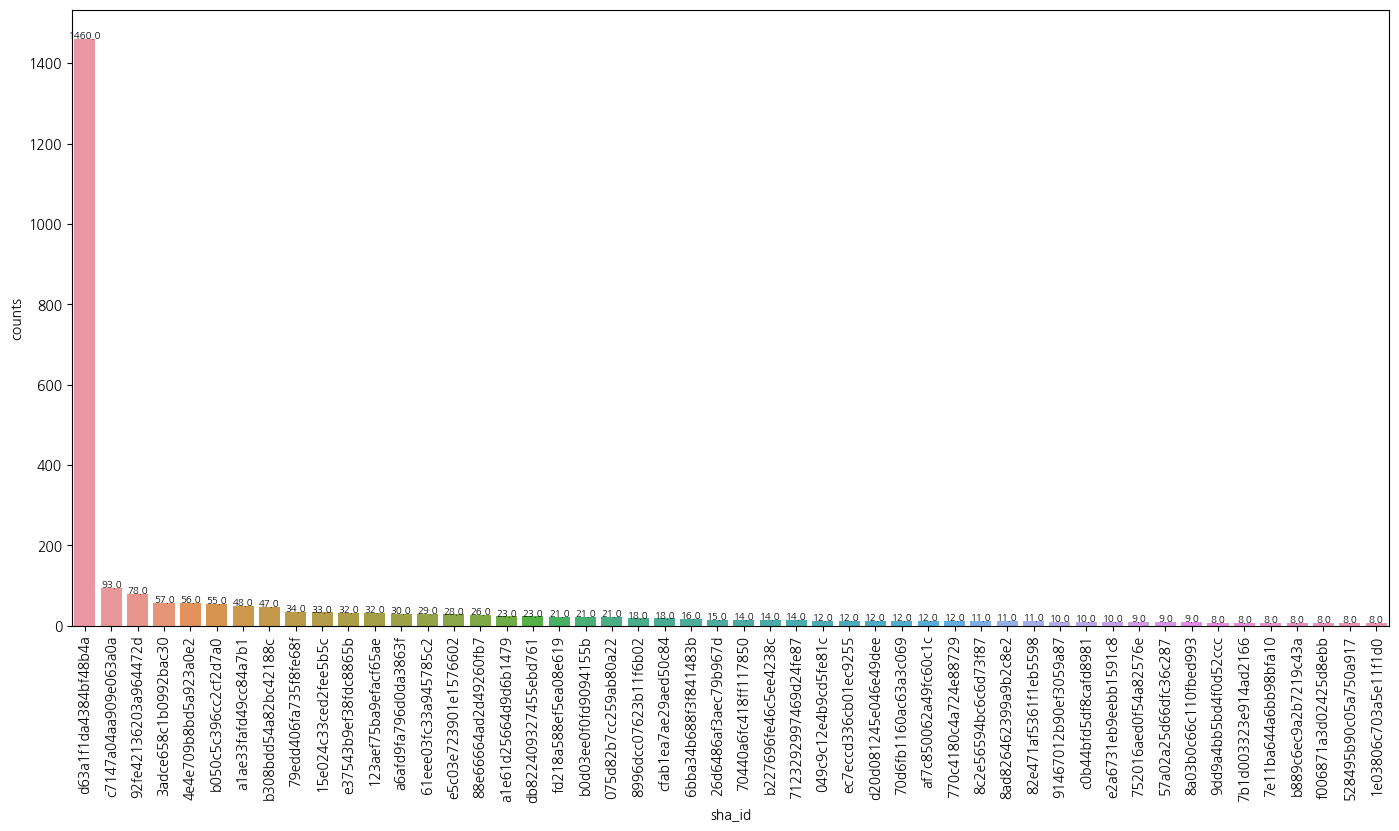

In [88]:
article_list_head = article_list.head(50)
ax = sns.barplot(data=article_list_head, x=article_list_head.index,y='counts')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 7)
plt.show()

* 유저당 게시한 article의 수가 적음

# board_uri_name

In [78]:
print('board_uri_name의 unique: ', df['board_uri_name'].unique())
board = pd.DataFrame(df['board_uri_name'].value_counts())
board

board_uri_name의 unique:  ['ClinicForest' 'ManagementContents' 'SeriesForest' 'MediTV']


,board_uri_name
SeriesForest,2296
ClinicForest,643
ManagementContents,451
MediTV,48


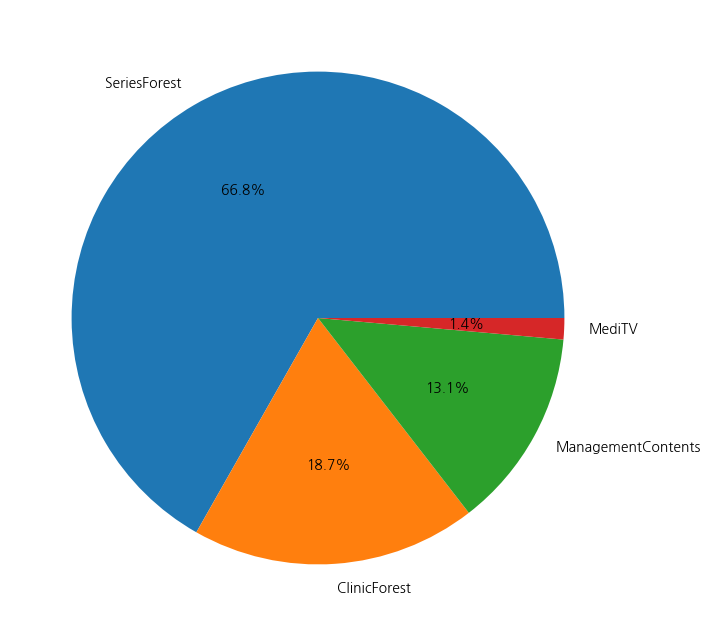

In [80]:
labels = board.index

plt.pie(board['board_uri_name'].values, labels = labels, autopct='%.1f%%')
plt.show()

# writer_type
게시물을 실명, 닉네임, 익명으로 게시했는지 나타내는 컬럼

In [93]:
writer_type = pd.DataFrame(df['writer_type'].value_counts())

,writer_type
REALNAME,2265
NICKNAME,650
ANONY,523


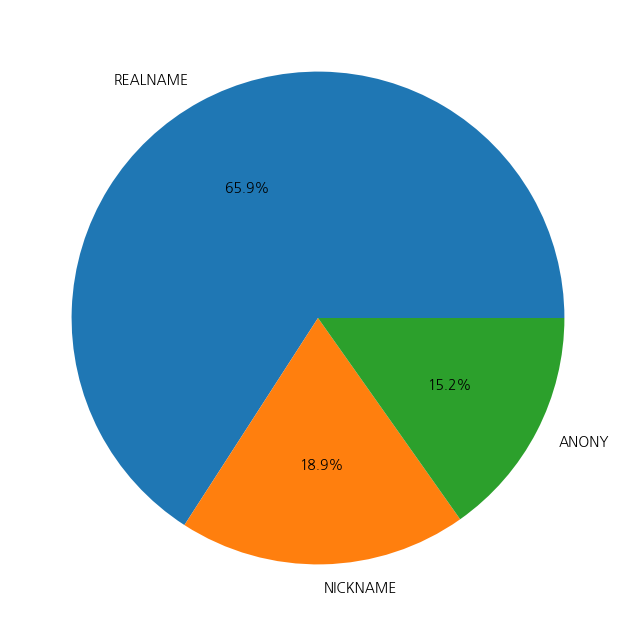

In [95]:
writer_type = pd.DataFrame(df['writer_type'].value_counts())

labels = writer_type.index

plt.pie(writer_type['writer_type'].values, labels = labels, autopct='%.1f%%')
plt.show()

실명으로 글을 게시한 유저가 가장 많았다.

# 날짜별 게시된 article 수

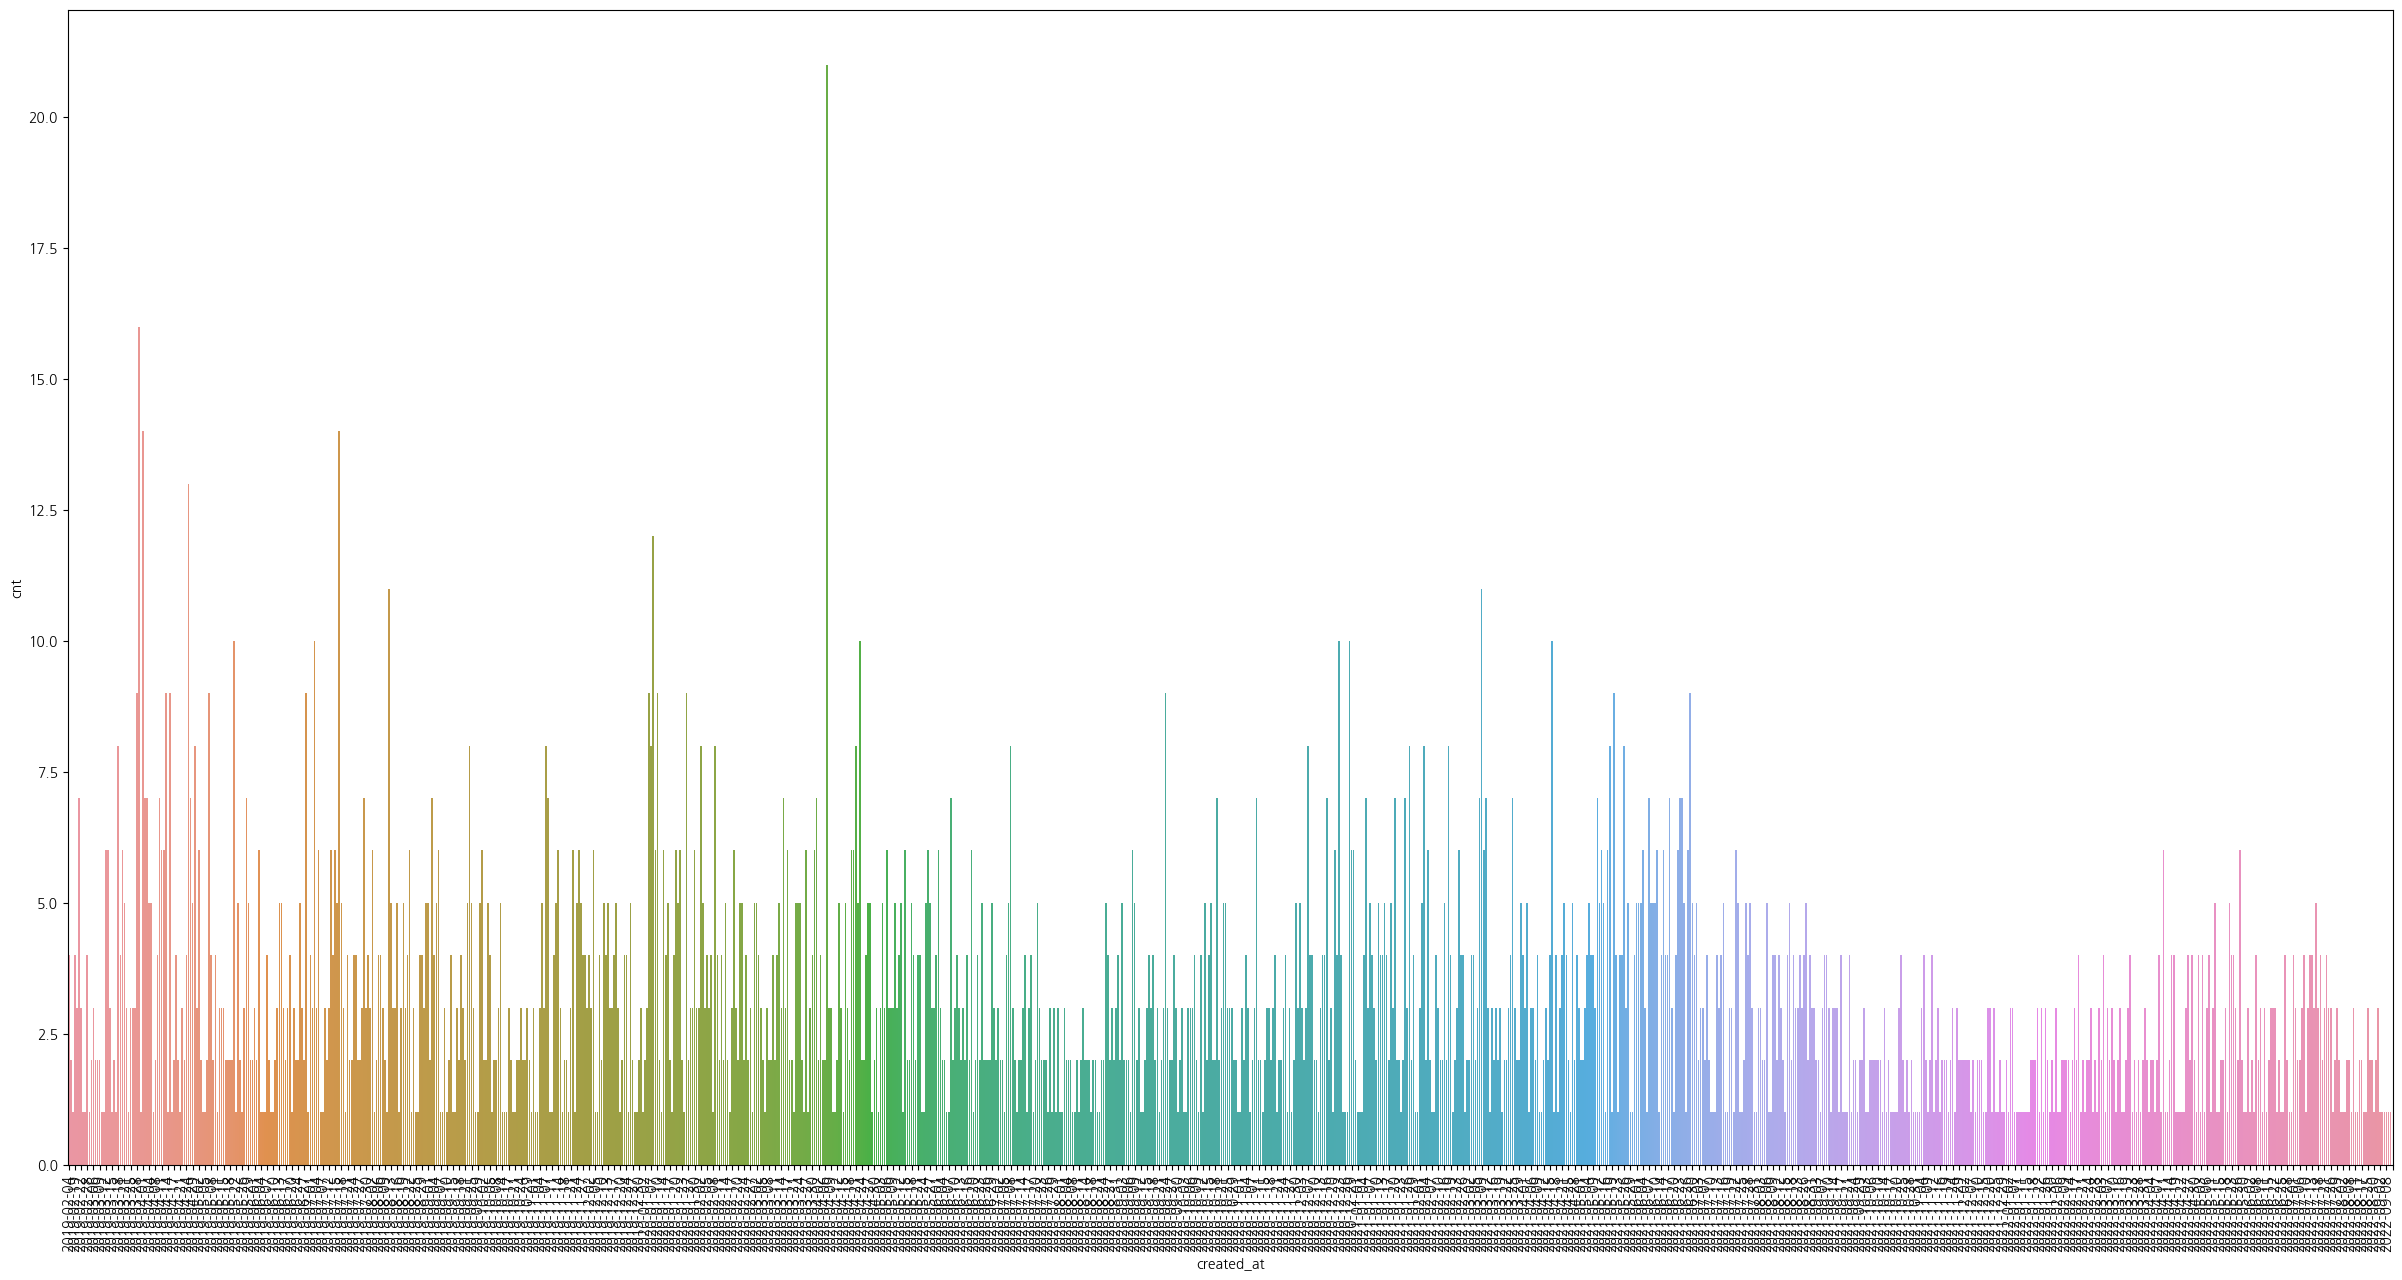

In [105]:
dat_groupby = df.groupby(['created_at'])[['id']].count().reset_index().rename(columns={'id':'cnt'})
dat_sort = dat_groupby.sort_values(by='created_at')

x = dat_sort['created_at']
y = dat_sort['cnt']

plt.figure(figsize=(30,15))
ax = sns.barplot(x=x,y=y)
total_len = len(x)
ax.set_xticks(np.arange(0, total_len+1, 3))
plt.xticks(rotation=90)
plt.show()

In [143]:
date = dat_groupby.sort_values(by='cnt', ascending=False)
date

,created_at,cnt
367,2020-04-07,21
34,2019-03-29,16
131,2019-07-17,14
36,2019-04-01,14
58,2019-04-25,13
...,...,...
810,2021-07-25,1
809,2021-07-24,1
186,2019-09-15,1
806,2021-07-21,1


# 요일별 게시물 수

In [129]:
import datetime

days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'sun']

# created_at의 날짜의 요일을 나타내는 컬럼 만들기
df['day']= df['created_at'].apply(lambda x: days[x.weekday()])

In [141]:
days = df.groupby(['day'])[['id']].count().reset_index().rename(columns={'id':'cnt'})
days = days.sort_values(by='cnt', ascending=False)
days

,day,cnt
5,tue,636
6,wed,611
0,fri,588
1,mon,587
4,thr,575
3,sun,237
2,sat,204


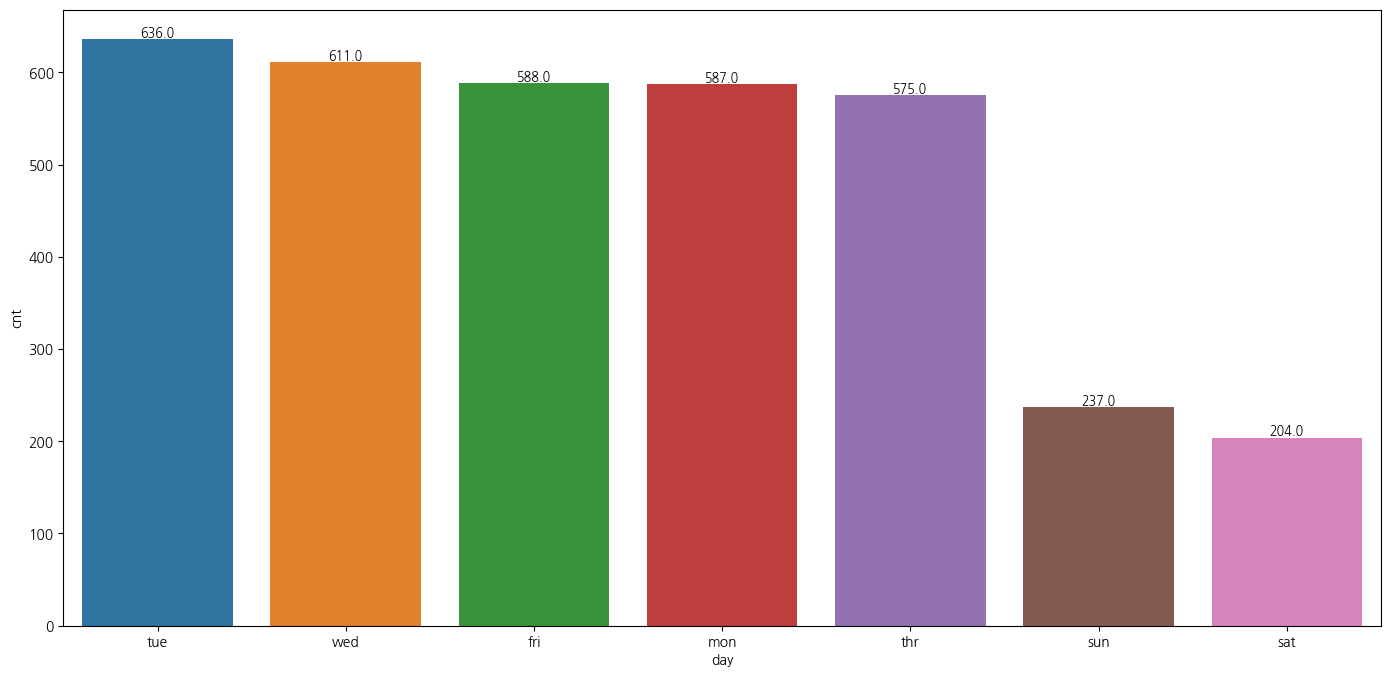

In [142]:
ax = sns.barplot(data=days, x='day',y='cnt')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 360)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

메디스트림의 유저들은 주로 평일에 게시물을 올린다.